# 画像のFew-Shot

システムメッセージでのFew-Shotはテキストしか対応していないため、メッセージの履歴を使ってサンプルを与える。
このサンプルの実行はGPT-4Vモデルが必要です。

In [11]:
!python -m pip install openai
!python -m pip install python-dotenv
!python -m pip install pillow
import json
from openai import AzureOpenAI
from dotenv import load_dotenv
from PIL import Image
import os
import base64

In [5]:
load_dotenv()
deployment = os.environ['DPLOYMENT']
apikey = os.environ['API_KEY']
base = os.environ['BASE']
api_version=os.environ['API_VERSION']

In [6]:
client = AzureOpenAI(
  azure_endpoint = base, 
  api_key=apikey,  
  api_version=api_version
)

# 対象画像

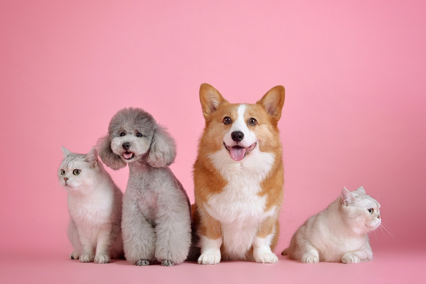

In [34]:
target_filename = "FewShotVisionImage/target.jpeg"
img = Image.open(target_filename)
img.resize((img.width//3, img.height//3))

# Few-Shot無しで呼び出し

In [17]:
with open(target_filename,"rb") as imagefile:
    target_b64_string = base64.b64encode(imagefile.read()).decode('utf-8')

In [28]:
response = client.chat.completions.create(
    model=deployment,
    messages=[
        {
          "role": "user",
          "content": [
            {"type": "text","text": "この画像を説明してください。概要、撮影場所、被写体の詳細に分けて説明してください。"},
            {"type": "image_url", "image_url": {"url": f"data:image/jpeg;base64,{target_b64_string}"}}
          ]
        }
    ],
    max_tokens=600,
    temperature=0
)

answer = response.choices[0].message.content
print(answer)

概要：この画像は、ピンクの背景の前に並んで座っている2匹の犬と2匹の猫のグループ写真です。

撮影場所：この画像はスタジオで撮影されたと思われます。背景は一様なピンク色で、照明も均一に当てられています。

被写体の詳細：左から、白い毛並みを持つ猫、灰色の毛並みを持つプードル犬、茶色と白の毛並みを持つコーギー犬、そしてもう一匹の白い毛並みを持つ猫がいます。犬たちはカメラに向かって笑顔を見せており、猫たちは横を向いています。犬たちは立っているのに対し、猫たちは座っています。全体的に、この写真はペットの可愛らしさを強調しています。


# Few-Shotを与える

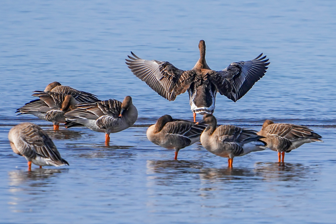

In [31]:
sample_filename = "FewShotVisionImage/sample.jpeg"
img = Image.open(sample_filename)
img.resize((img.width//10, img.height//10))

In [23]:
with open(sample_filename,"rb") as imagefile:
    sample_b64_string = base64.b64encode(imagefile.read()).decode('utf-8')

In [29]:
response = client.chat.completions.create(
    model=deployment,
    messages=[
        {
          "role": "user",
          "content": [
            {"type": "text","text": "この画像を説明してください。概要、撮影場所、被写体の詳細に分けて説明してください。"},
            {"type": "image_url", "image_url": {"url": f"data:image/jpeg;base64,{sample_b64_string}"}}
          ]
        },
        {"role": "assistant", "content": "【概要】この画像は動物の集合写真です。オオヒシクイが8羽写っています。¥n【撮影場所】鳥たちは水の上に立っており、水深が浅い湖で撮影されたと予想されます。¥n【被写体の詳細】1羽は羽を広げて画像の奥を見ていますが、他の7羽は羽を閉じて立っています。"},
        {
          "role": "user",
          "content": [
            {"type": "text","text": "この画像を説明してください。概要、撮影場所、被写体の詳細に分けて説明してください。"},
            {"type": "image_url", "image_url": {"url": f"data:image/jpeg;base64,{target_b64_string}"}}
          ]
        },
    ],
    max_tokens=600,
    temperature=0
)

answer = response.choices[0].message.content
print(answer)

【概要】この画像はペットの集合写真です。犬2匹と猫2匹がピンクの背景の前に並んでいます。

【撮影場所】この写真はスタジオまたは室内で撮影されたと思われます。背景は一色で、照明が均一に当たっているためです。

【被写体の詳細】左から、白と灰色の短毛の猫、灰色のカットされた毛のプードル、茶色と白のコーギー、そしてもう一匹の白と灰色の短毛の猫がいます。犬たちはカメラを見て笑顔を見せていますが、猫たちは横を向いています。全てのペットは座っており、リラックスした様子です。
